In [3]:
import MetaTrader5 as mt5
from datetime import datetime
import pandas as pd
import numpy as np

In [4]:
if not mt5.initialize():
    print('Failed')
data = mt5.copy_rates_range('EURUSD', mt5.TIMEFRAME_D1, datetime(2023, 1, 1), datetime.today())
data

array([(1672617600, 1.06877, 1.0705 , 1.06497, 1.06582,  22707, 14, 0),
       (1672704000, 1.06647, 1.06827, 1.05188, 1.05471, 126421, 14, 0),
       (1672790400, 1.05467, 1.06348, 1.05404, 1.06041, 125927, 14, 0),
       (1672876800, 1.06035, 1.06307, 1.05142, 1.05196, 128436, 14, 0),
       (1672963200, 1.05196, 1.06474, 1.04817, 1.06426, 137326, 14, 0),
       (1673222400, 1.06395, 1.07598, 1.0635 , 1.0733 , 110736, 14, 0),
       (1673308800, 1.07317, 1.07586, 1.07114, 1.07332, 110670, 14, 0),
       (1673395200, 1.0733 , 1.07756, 1.07248, 1.07556,  87840, 14, 0),
       (1673481600, 1.0751 , 1.08663, 1.07293, 1.08497, 149398, 14, 0),
       (1673568000, 1.08483, 1.08672, 1.07798, 1.08323, 118690, 14, 0),
       (1673827200, 1.08309, 1.08735, 1.08008, 1.0821 ,  70983, 14, 0),
       (1673913600, 1.08207, 1.08687, 1.07738, 1.07893, 119723, 14, 0),
       (1674000000, 1.07886, 1.08867, 1.07654, 1.07947, 159975, 14, 0),
       (1674086400, 1.07935, 1.08392, 1.07817, 1.08302, 114289, 

In [5]:
columns = ['time', 'open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume']

# Convertir la lista de tuplas en un DataFrame
df = pd.DataFrame(data)

df['time'] = pd.to_datetime(df['time'],unit='s')
df.set_index(['time'], inplace=True)


# Mostrar el DataFrame resultante
df.head()

,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,
2023-01-02,1.06877,1.07050,1.06497,1.06582,22707,14,0
2023-01-03,1.06647,1.06827,1.05188,1.05471,126421,14,0
2023-01-04,1.05467,1.06348,1.05404,1.06041,125927,14,0
2023-01-05,1.06035,1.06307,1.05142,1.05196,128436,14,0
2023-01-06,1.05196,1.06474,1.04817,1.06426,137326,14,0


In [6]:
df.isnull().sum()

open           0
high           0
low            0
close          0
tick_volume    0
spread         0
real_volume    0
dtype: int64

In [7]:
df.dtypes

open           float64
high           float64
low            float64
close          float64
tick_volume     uint64
spread           int32
real_volume     uint64
dtype: object

## ARIMA

In [8]:
# Import libraries
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Defaults
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 12})
plt.style.use('ggplot')

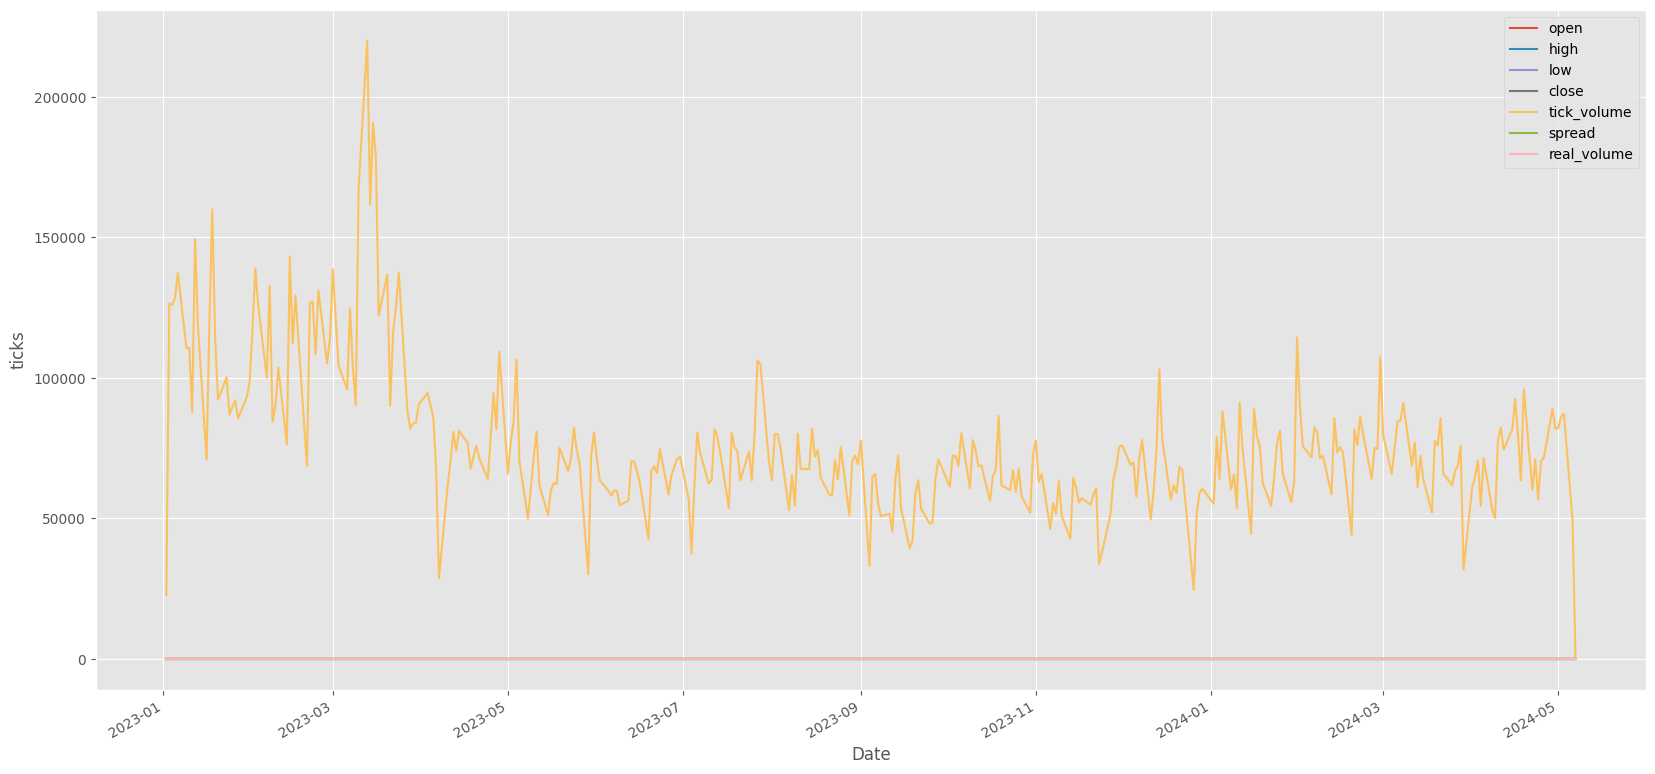

In [9]:
# Plot the data
df.plot()
plt.ylabel('ticks')
plt.xlabel('Date')
plt.show()

No seasonality, light decrease in tendency. Variance started high, decreased and kinda stayed constant.

---
- p is the number of autoregressive terms (AR part). It allows to incorporate the effect of past values into our model. Intuitively, this would be similar to stating that it is likely to be warm tomorrow if it has been warm the past 3 days.

- d is the number of nonseasonal differences needed for stationarity. Intuitively, this would be similar to stating that it is likely to be same temperature tomorrow if the difference in temperature in the last three days has been very small.

- q is the number of lagged forecast errors in the prediction equation (MA part). This allows us to set the error of our model as a linear combination of the error values observed at previous time points in the past.

In [10]:
# Define the d and q parameters to take any value between 0 and 1
q = d = range(0, 2)
# Define the p parameters to take any value between 0 and 3
p = range(0, 4)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations ARIMA...')
print('ARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('ARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('ARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('ARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations ARIMA...
ARIMAX: (0, 0, 1) x (0, 0, 1, 12)
ARIMAX: (0, 0, 1) x (0, 1, 0, 12)
ARIMAX: (0, 1, 0) x (0, 1, 1, 12)
ARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [11]:
df.head()

,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,
2023-01-02,1.06877,1.07050,1.06497,1.06582,22707,14,0
2023-01-03,1.06647,1.06827,1.05188,1.05471,126421,14,0
2023-01-04,1.05467,1.06348,1.05404,1.06041,125927,14,0
2023-01-05,1.06035,1.06307,1.05142,1.05196,128436,14,0
2023-01-06,1.05196,1.06474,1.04817,1.06426,137326,14,0


In [12]:
df.tail()

,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,
2024-05-01,1.06660,1.07323,1.06489,1.07168,82214,11,0
2024-05-02,1.07151,1.07296,1.06733,1.07253,86222,11,0
2024-05-03,1.07249,1.08109,1.07220,1.07628,87220,11,0
2024-05-06,1.07608,1.07902,1.07547,1.07693,49081,11,0
2024-05-07,1.07681,1.07699,1.07654,1.07662,709,14,0


In [13]:
train_data = df.iloc[:int(len(df)*0.8)]
test_data = df.iloc[int(len(df)*0.8):]

In [21]:
endog = train_data['high']

In [24]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = []
ARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.arima.ARIMA(endog,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            ARIMAX_model.append([param, param_seasonal])
        except Exception as e:
            print(f'Error: {e}')

In [25]:
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), ARIMAX_model[AIC.index(min(AIC))][0],ARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC is -2223.809633586876 for model SARIMAX(1, 0, 0)x(0, 0, 0, 12)


In [ ]:
# Let's fit this model
mod = sm.tsa.statespace.SARIMAX(train_data,
                                order=ARIMAX_model[AIC.index(min(AIC))][0],
                                seasonal_order=ARIMAX_model[AIC.index(min(AIC))][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()